# Slopegraphs

Slopegraphs are always introduced as being introduced by this Edward Tufte [post](https://www.edwardtufte.com/bboard/q-and-a-fetch-msg?msg_id=0003nk), though [this page](http://charliepark.org/slopegraphs/) is my top Google hit for "slopegraph."
I'm not sure if the kind of plot I'm talking about is technically a slopegraph, but in my academic circles that's usually the term we end up settling on after a conversation that almost always sounds like, "you know, those plots which are kind of like boxplots except the paired points are connected with lines."
A [recent paper](https://www.ncbi.nlm.nih.gov/pubmed/28591632) (closed access, sorry) comparing microbiome and glycemic responses to different types of bread is the first example that comes to mind, but I do think these are fairly ubiquitous in the literature (if difficult to find, because there isn't a good keyword to search for!)
Technically they're not quite slopegraphs, since the points are showing continuous values rather than ordered categorical variables.
But, tomato toh-mah-toe.

![Figure 1C and D of Korem et al (2017) shows the kind of slopegraph I'm talking about being used in the literature. Even with not that many lines, it's pretty unclear what we're supposed to get out of the figure - even though the takeaway is that there isn't really a trend either way.](slopegraph_example_Korem_2017.png)

Plotting paired data as slopegraphs is actually not my favorite way to show paired data, since in almost all cases the lines connecting the points end up very jumbled and difficult to distinguish any patterns from. 
I think the best option to explore and analyze paired data is to put the points on a scatter plot, where the x- and y-axes show the value for each member of the pair.
For example, if you're plotting the average abundance of different microbes in healthy patients vs. patients with a disease, you'd have `abundance in healthy` on the x-axis and `abundance in diseased patients` on the y-axis, and each point would be a microbe.
That said, these plots can be more difficult to interpret, especially for people who aren't as familiar with statistics or who are expecting a more "visual" slopegraph.

Another option is just to plot the differences, but then this loses information about the actual values of each point in the pairs.
And finally, regardless of the best way to show the data, many times your advisor wants you to try a slopegraph anyway and so you can choose to argue with her or just produce the plot and then decide together whether it's a good way to show the data.

So let's do that! 

(Spoiler: in my particular case that motivated this post, my advisor ended up being right and the slopegraph was totally the best way to show the data. It's also very clinician-friendly, which is good because this was clinical data!)

# Generate data

First, let's set up some toy data. I'll use essentially the same data as in my [boxplots post](https://cduvallet.github.io/posts/2018/03/boxplots-in-python). We'll be simulating making some measurements on three different body sites for 15 healthy patients and 15 diseased patients. Because we're making slopegraphs, we're assuming that these are paired measurements - say, the abundance of a specific microbe on a tumor sample and on a nearby non-cancer sample.

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Set up the data
data = np.concatenate(
    [[np.random.normal(loc=1, size=15), 15*['site1'], 15*['healthy']],
     [np.random.normal(loc=3, size=15), 15*['site2'], 15*['healthy']],
     [np.random.normal(loc=0, size=15), 15*['site3'], 15*['healthy']],
     [np.random.normal(loc=1, size=15), 15*['site1'], 15*['disease']],
     [np.random.normal(loc=1, size=15), 15*['site2'], 15*['disease']],
     [np.random.normal(loc=3, size=15), 15*['site3'], 15*['disease']]], 
    axis=1)
df = pd.DataFrame(columns=['value', 'site', 'label'], data=data.T)
df['value'] = df['value'].astype(float)

# Show every ninth row
df.iloc[::9]

,value,site,label
0,0.462536,site1,healthy
9,0.606038,site1,healthy
18,2.793179,site2,healthy
27,2.903060,site2,healthy
36,-0.166360,site3,healthy
45,1.827056,site1,disease
54,1.483208,site1,disease
63,0.938095,site2,disease
72,1.203820,site2,disease
81,3.761979,site3,disease


# Make a basic slope graph

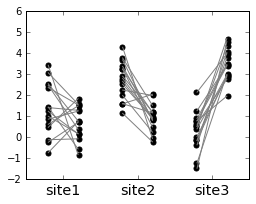

In [35]:
fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)
    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values
    
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Plot the lines connecting the dots
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], c='gray')

    # Plot the points
    ax.scatter(len(h)*[x1-0.01], h, c='k', 
               s=25, label='healthy')
    ax.scatter(len(d)*[x2+0.01], d, c='k',
               s=25, label='disease')

        
    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')


That's the most basic skeleton code. Now let's add some bells and whistles:

- Change the color of the points to indicate healthy [blue] or disease [red].    
- Color the lines according to their slopes: blue if higher in healthy, red if higher in disease   
- Add a legend    

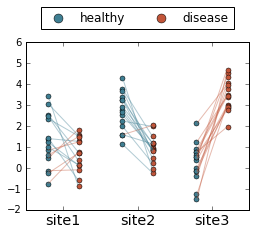

In [36]:
red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)
    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values
    
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points
    # Note: s=25 increase the default point size, lw=0.5 decreases the default
    # point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue, 
               s=25, lw=0.5, label='healthy')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
               s=25, lw=0.5, label='disease')

    # Update x-axis
    i += 1

# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
              fontsize='large',
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.25), 
              ncol=2,
              scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]


Finally, if you want to get *really* fancy, you can overlay this with a boxplot and jitter the points. 

Full disclosure: I made this plot just to see what it would look like, and quickly decided this was a terrible way to visualize data. But, since I went through the work of making it, perhaps it will be useful to someone someday!

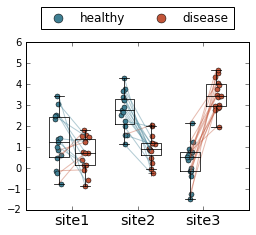

In [78]:
red = '#C25539'
blue = '#3F7F93'

fig, ax = plt.subplots(figsize=(4, 3))

# Set up list to track sites
sites = []
# Set up lists to track boxplot data
for_boxplot = []
positions = []

i = 1.0
for site, subdf in df.groupby('site'):
    sites.append(site)

    # Get the values for healthy and disease patients
    h = subdf.query('label == "healthy"')['value'].values
    d = subdf.query('label == "disease"')['value'].values
    
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    ## Track values for one call to boxplot after the loop
    # Add the healthy (left) values first
    for_boxplot.append(h)
    # and disease (right) values next
    for_boxplot.append(d)    
    
    # And track positions
    positions += [x1, x2]

    # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]

    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)

    # Plot the points

    # Set up some noise for jitter
    noise = np.random.normal(loc=0, scale=0.025, size=len(h))

    ax.scatter(len(h)*[x1-0.01] + noise, h, c=blue, 
               s=25, lw=0.5, label='healthy')
    ax.scatter(len(d)*[x2+0.01] + noise, d, c=red,
               s=25, lw=0.5, label='disease')

    # Update x-axis
    i += 1

## Overlay boxplot
# Set up some parameters for the boxplot
boxprops = {'linewidth': 0.75, 'color': 'k'}
lineprops = {'linewidth': 0.75, 'color': 'k', 'linestyle': '-'}

boxplot_kwargs = dict({'boxprops': boxprops, 'medianprops': lineprops,
                       'whiskerprops': lineprops, 'capprops': lineprops})
bp = ax.boxplot(for_boxplot, positions=positions, 
                widths=0.3, **boxplot_kwargs)       
    
# Fix the axes and labels
ax.set_xticks([1, 2, 3])
_ = ax.set_xticklabels(sites, fontsize='x-large')

# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],   
              fontsize='large',
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.25), 
              ncol=2,
              scatterpoints=1)
# Make the points in the legend larger
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
